In [2]:
import numpy as np
import pandas as pd

### 1.1 데이터 불러오기

In [3]:
dat=pd.read_csv('data.csv')

### 1.2 데이터 확인

In [4]:
dat.info

<bound method DataFrame.info of          transaction_id  apartment_id   city     dong   jibun         apt  \
0                     0          7622  서울특별시      신교동    6-13    신현(101동)   
1                     1          5399  서울특별시      필운동     142      사직파크맨션   
2                     2          3578  서울특별시      필운동   174-1      두레엘리시안   
3                     3         10957  서울특별시      내수동      95       파크팰리스   
4                     4         10639  서울특별시      내수동  110-15        킹스매너   
...                 ...           ...    ...      ...     ...         ...   
1216548         1234823          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216549         1234824          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216550         1234825          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   
1216551         1234826          9586  부산광역시  정관읍 용수리    1364   정관신도시롯데캐슬   
1216552         1234827          9578  부산광역시  정관읍 용수리    1387  정관 동일스위트1차   

                         addr_kr  exclusive

In [5]:
pd.isnull(dat)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,False,False,False,False,False,False,False,False,False,False,False,False,False
1216549,False,False,False,False,False,False,False,False,False,False,False,False,False
1216550,False,False,False,False,False,False,False,False,False,False,False,False,False
1216551,False,False,False,False,False,False,False,False,False,False,False,False,False


### 1.3 불필요한 행 삭제

In [6]:
dat = dat[dat.city=="서울특별시"]

In [7]:
dat = dat.reset_index()

### 1.4 변수 이름 바꾸기

In [8]:
dat = dat.rename(columns={'transaction_real_price':'price'})

### 1.5 불필요한 변수 삭제

In [9]:
dat = dat.drop(['transaction_id', 'apartment_id','jibun' ,'city'],axis=1)

In [10]:
dat.info #열개수 줄었당

<bound method DataFrame.info of           index dong        apt            addr_kr  exclusive_use_area  \
0             0  신교동   신현(101동)  신교동 6-13 신현(101동)               84.82   
1             1  필운동     사직파크맨션     필운동 142 사직파크맨션               99.17   
2             2  필운동     두레엘리시안   필운동 174-1 두레엘리시안               84.74   
3             3  내수동      파크팰리스       내수동 95 파크팰리스              146.39   
4             4  내수동       킹스매너    내수동 110-15 킹스매너              194.43   
...         ...  ...        ...                ...                 ...   
742280  1184014  강일동  고덕리엔파크2단지  강일동 717 고덕리엔파크2단지               59.72   
742281  1184015  강일동  강일리버파크3단지  강일동 674 강일리버파크3단지               59.87   
742282  1184016  강일동  강일리버파크3단지  강일동 674 강일리버파크3단지               84.74   
742283  1184017  강일동  강일리버파크1단지  강일동 665 강일리버파크1단지               84.74   
742284  1184018  강일동  고덕리엔파크2단지  강일동 717 고덕리엔파크2단지               84.98   

        year_of_completion  transaction_year_month transaction_date  floor  \
0

### 1.6 연/월 뽑기

In [11]:
dat =dat.assign(transaction_year=dat['transaction_year_month'].astype(str).str[0:4].astype(int),
                transaction_month=dat['transaction_year_month'].astype(str).str[4:6].astype(int))

### 1.7 필요 연도 뽑기

In [12]:
dat = dat[dat.transaction_year >= 2012].reset_index() #거래일 기준 2012년 이후

In [13]:
dat=dat.drop(['level_0','index'],axis=1)

## 2. 데이터 시각화

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

### 2.1 거래가격 분포 확인

Text(0.5, 0, 'Price')

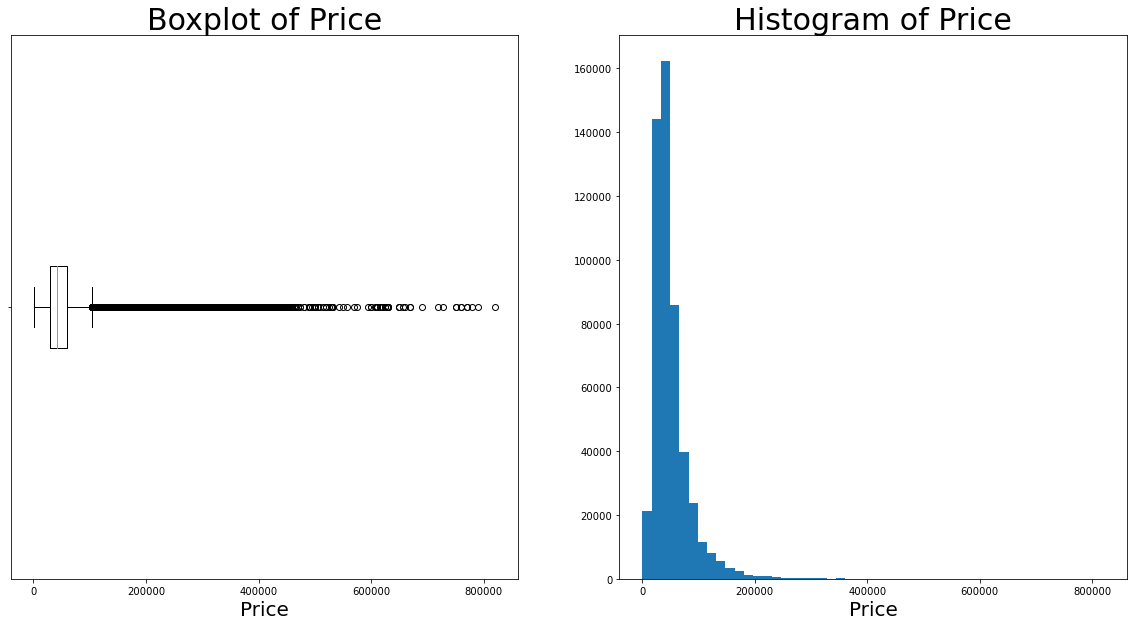

In [15]:
firstplot = plt.figure(figsize=(20,10))
axes1 = firstplot.add_subplot(1, 2, 1)
axes2 = firstplot.add_subplot(1, 2, 2)

axes1.boxplot(dat['price'],vert=False,labels=['']) 
axes1.set_title('Boxplot of Price',fontsize=30) 
axes1.set_xlabel('Price',fontsize=20)

axes2.hist(dat['price'],bins=50) 
axes2.set_title('Histogram of Price',fontsize=30)
axes2.set_xlabel('Price',fontsize=20)

박스플롯,,, 끔찍하게 많은 이상치,,,  
히스토그램을 보면 왼쪽으로 치우친 분포임을 알 수 있다.  
집값이 너무 비싸면 안되니까,,

Text(0, 0.5, '')

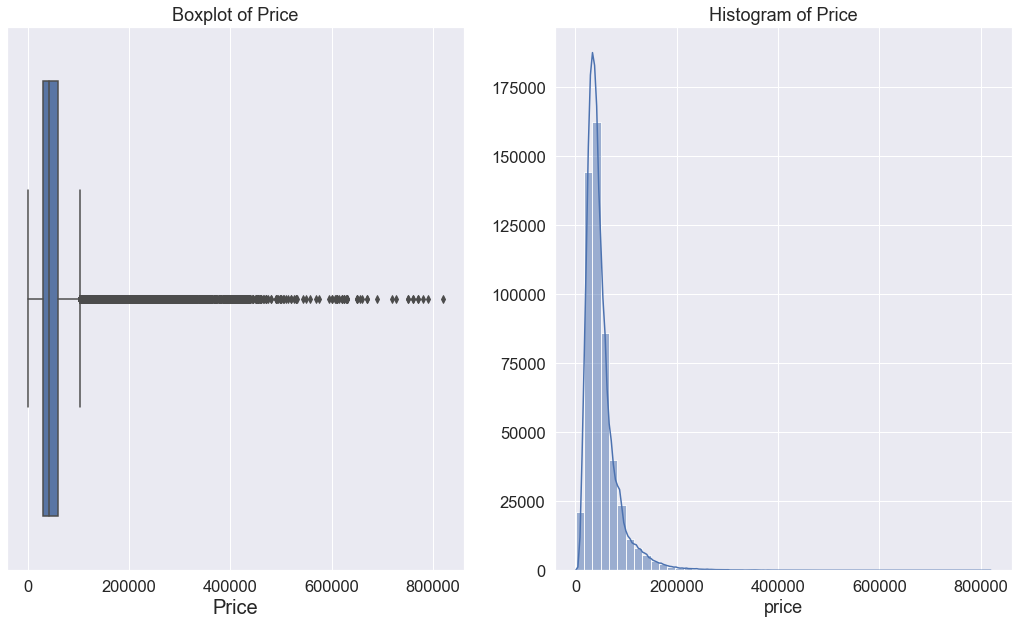

In [16]:
sns.set(font_scale = 1.5) 
fig,axs = plt.subplots(ncols = 2, figsize = (18, 10)) 

sns.boxplot(ax=axs[0], x='price',data=dat)
axs[0].set_title('Boxplot of Price')
axs[0].set_xlabel('Price',fontsize=20)

sns.histplot(data=dat['price'],ax=axs[1],bins=50,kde=True)
axs[1].set_title('Histogram of Price')
axs[1].set_ylabel('',fontsize=20)

### 2.2 거래연도 분포 확인 / 거래연도별 가격 분포 확인

Text(0, 0.5, 'Price')

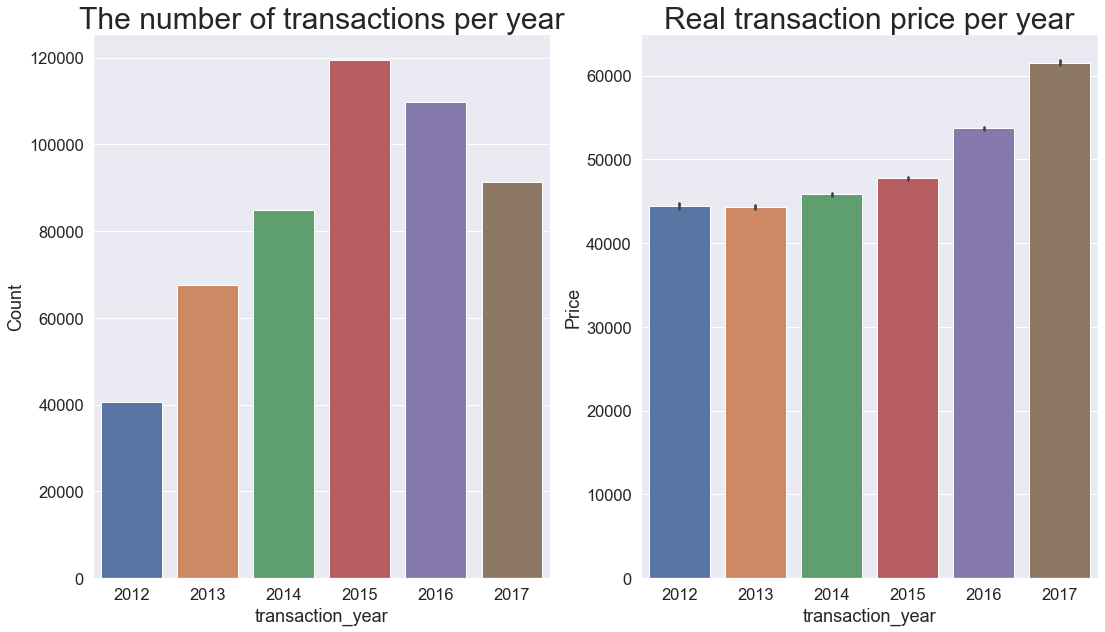

In [17]:
sns.set(font_scale = 1.5) 
fig,axs = plt.subplots(ncols = 2, figsize = (18, 10)) 

sns.countplot(data=dat,ax=axs[0],x='transaction_year')
axs[0].set_title('The number of transactions per year',fontsize=30)
axs[0].set_ylabel('Count')

sns.barplot(data=dat,ax=axs[1],x='transaction_year',y='price')
axs[1].set_title('Real transaction price per year',fontsize=30)
axs[1].set_ylabel('Price')


거래 횟수는 2015년까지는 증가하다가 2015년 이후에는 하락하는 추세로 접어들었다.  
하지만 집값은 점점 증가하고 특히 2016년부터는 증가폭이 커지고 있다.  
집값이 올라서 거래 횟수가 줄어든 것일까..?

### 2.3  층 분포 확인 / 층별 가격 분포 확인

[]

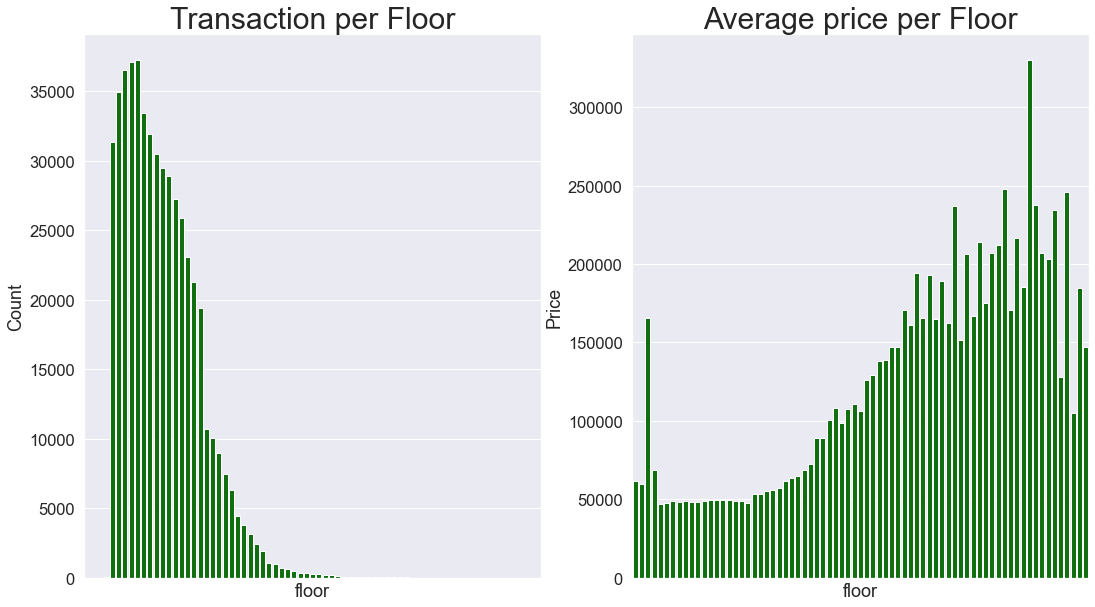

In [18]:
sns.set(font_scale = 1.5) 
fig,axs = plt.subplots(ncols = 2, figsize = (18, 10)) 

sns.countplot(data=dat,ax=axs[0],x='floor',color='green')
axs[0].set_title('Transaction per Floor',fontsize=30)
axs[0].set_ylabel('Count')
axs[0].set_xticks([])

sns.barplot(data=dat,ax=axs[1],x='floor',y='price',color='green',ci=None)
axs[1].set_title('Average price per Floor',fontsize=30)
axs[1].set_ylabel('Price')
axs[1].set_xticks([])

고층일수록 거래량은 줄어들지만 가격은 비싸지는 추세를 보인다.  
펜트하우스..?

### 2.4 완공연도 분포 확인 / 완공연도별 가격 분포 확인

[]

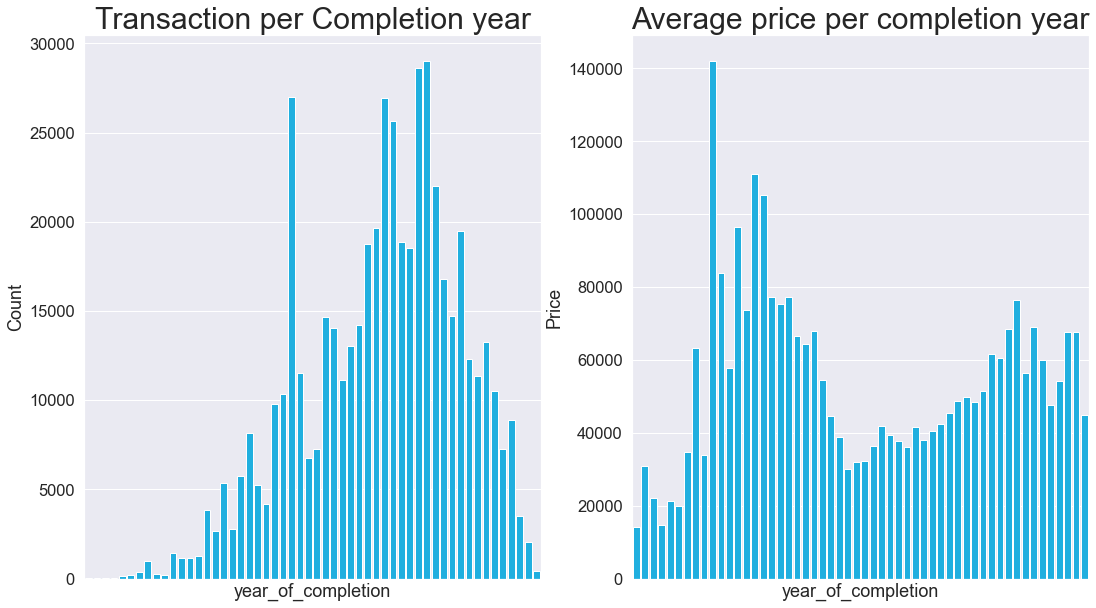

In [19]:
sns.set(font_scale = 1.5) 
fig,axs = plt.subplots(ncols = 2, figsize = (18, 10)) 

sns.countplot(data=dat,ax=axs[0],x='year_of_completion',color='deepskyblue')
axs[0].set_title('Transaction per Completion year',fontsize=30)
axs[0].set_ylabel('Count')
axs[0].set_xticks([])

sns.barplot(data=dat,ax=axs[1],x='year_of_completion',y='price',color='deepskyblue',ci=None)
axs[1].set_title('Average price per completion year',fontsize=30)
axs[1].set_ylabel('Price')
axs[1].set_xticks([])

최근의 아파트가 더 많은 거래량을 갖는 추세를 보인다.  
하지만, 가격은 옛날에 지어진 아파트가 최신 아파트 만큼 높은 것을 확인 할 수 있다.  
이것은 재개발 보상을 노린 투기..?

## 3. 파생변수 생성

### 3.1 아파트 연차 변수 생성

[]

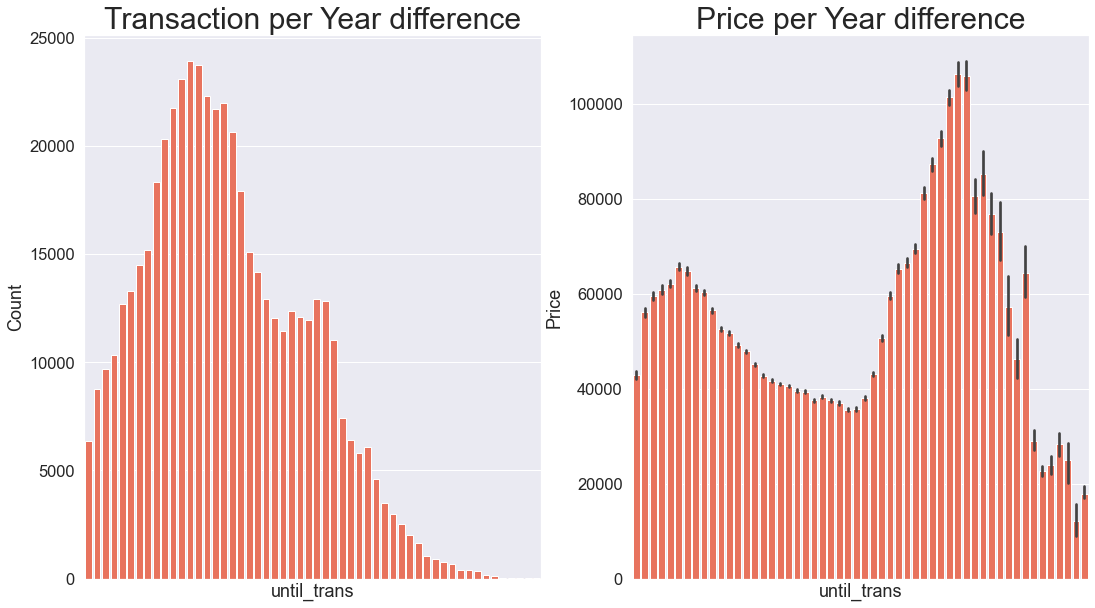

In [20]:
#dat에 until_trans 변수 추가
dat = dat.assign(until_trans=dat['transaction_year'] - dat['year_of_completion']+1)

sns.set(font_scale = 1.5) 
fig,axs = plt.subplots(ncols = 2, figsize = (18, 10)) 

sns.countplot(data=dat,ax=axs[0],x='until_trans',color='tomato')
axs[0].set_title('Transaction per Year difference',fontsize=30)
axs[0].set_ylabel('Count')
axs[0].set_xticks([])

sns.barplot(data=dat,ax=axs[1],x='until_trans',y='price',color='tomato')
axs[1].set_title('Price per Year difference',fontsize=30)
axs[1].set_ylabel('Price')
axs[1].set_xticks([])

### 3.2 거래 일 변수 변환

In [21]:
dat = dat.assign(transaction_date=np.where(dat['transaction_date']=='1~10',0,np.where(dat['transaction_date']=='11~20',1,2)))

### 3.3 월 변수와 10일 단위 변수 통합

In [22]:
dat = dat.assign(transaction_month_date=dat['transaction_month']*3 + dat['transaction_date'])

### 3.4 연도별 주기성을 위한 파생변수 생성 (삼각변환)

In [23]:
import math

#연도별 주기성 확인이 목표고, 1년당 transaction_month_date 변수값이 38까지 있으니까 주기가 38이 되게끔 38로 나누어 준다
dat = dat.assign(sin_date=np.sin(2*math.pi*dat['transaction_month_date']/38))
dat = dat.assign(cos_date=np.cos(2*math.pi*dat['transaction_month_date']/38))

#변수 제거
dat = dat.drop(['year_of_completion', 'transaction_year_month', 'transaction_date', 'transaction_month', 'transaction_month_date'],axis=1)
dat.head()

,dong,apt,addr_kr,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),95.88,6,70000,2012,5,0.475947,0.879474
1,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),108.55,11,100500,2012,5,0.614213,0.789141
2,사직동,광화문풍림스페이스본(9-0),사직동 9 광화문풍림스페이스본(9-0),94.51,1,65800,2012,5,0.614213,0.789141
3,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,42.87,8,30500,2012,8,0.475947,0.879474
4,수송동,로얄팰리스스위트,수송동 85 로얄팰리스스위트,39.67,15,30500,2012,8,0.735724,0.677282


### 3.5 삼각변환을 통한 장점

dummy 인코딩을 하면 가변수가 너무 많아져서 차원이 너무 높아진다. 차원의 저주,,  
Label 인코딩을 하면 아무런 연관 없이 할당된 점수에 어떤 의미가 부여돼서 학습이 이루어 지는 문제가 발생할 수 있다.  
하지만, 삼각변환을 하게 되면, 삼각함수의 주기성 덕분에 시계열을 띄는 데이터에 숨겨져 있던 패턴을 찾을 수 있게 된다.

## 4. 텍스트 데이터 다루기

### 4.1 아파트 이름 한글부분만 뽑기

In [24]:
apt = dat['apt']
apt = apt.str.replace(pat=r'[^\w]',repl=r'').str.replace('\d+','').str.replace(pat='[a-zA-z]',repl=r'').str.replace(pat='Ⅲ',repl=r'')
apt.head()

0    광화문풍림스페이스본
1    광화문풍림스페이스본
2    광화문풍림스페이스본
3      로얄팰리스스위트
4      로얄팰리스스위트
Name: apt, dtype: object

### 4.2 아파트 이름 DTM

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

cvz=CountVectorizer(min_df=5)
print(cvz.fit_transform(apt))


  (0, 270)	1
  (1, 270)	1
  (2, 270)	1
  (3, 1039)	1
  (4, 1039)	1
  (5, 1039)	1
  (6, 1039)	1
  (7, 3772)	1
  (8, 3772)	1
  (9, 3772)	1
  (10, 2722)	1
  (11, 3171)	1
  (12, 3171)	1
  (13, 765)	1
  (14, 887)	1
  (15, 3171)	1
  (16, 3051)	1
  (17, 857)	1
  (18, 1025)	1
  (19, 1621)	1
  (21, 623)	1
  (22, 270)	1
  (23, 2032)	1
  (24, 3446)	1
  (25, 3346)	1
  :	:
  (513503, 3334)	1
  (513504, 3334)	1
  (513505, 3199)	1
  (513506, 62)	1
  (513507, 3196)	1
  (513508, 1621)	1
  (513509, 3643)	1
  (513510, 3643)	1
  (513511, 1621)	1
  (513512, 510)	1
  (513513, 2672)	1
  (513514, 508)	1
  (513515, 3199)	1
  (513516, 1621)	1
  (513517, 3643)	1
  (513518, 63)	1
  (513519, 97)	1
  (513520, 97)	1
  (513521, 97)	1
  (513522, 97)	1
  (513523, 195)	1
  (513524, 97)	1
  (513525, 97)	1
  (513526, 97)	1
  (513527, 195)	1


### 4.3 아파트 이름 tf-idf

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvz=TfidfVectorizer(min_df=5)
print(tvz.fit_transform(apt))

  (0, 270)	1.0
  (1, 270)	1.0
  (2, 270)	1.0
  (3, 1039)	1.0
  (4, 1039)	1.0
  (5, 1039)	1.0
  (6, 1039)	1.0
  (7, 3772)	1.0
  (8, 3772)	1.0
  (9, 3772)	1.0
  (10, 2722)	1.0
  (11, 3171)	1.0
  (12, 3171)	1.0
  (13, 765)	1.0
  (14, 887)	1.0
  (15, 3171)	1.0
  (16, 3051)	1.0
  (17, 857)	1.0
  (18, 1025)	1.0
  (19, 1621)	1.0
  (21, 623)	1.0
  (22, 270)	1.0
  (23, 2032)	1.0
  (24, 3446)	1.0
  (25, 3346)	1.0
  :	:
  (513503, 3334)	1.0
  (513504, 3334)	1.0
  (513505, 3199)	1.0
  (513506, 62)	1.0
  (513507, 3196)	1.0
  (513508, 1621)	1.0
  (513509, 3643)	1.0
  (513510, 3643)	1.0
  (513511, 1621)	1.0
  (513512, 510)	1.0
  (513513, 2672)	1.0
  (513514, 508)	1.0
  (513515, 3199)	1.0
  (513516, 1621)	1.0
  (513517, 3643)	1.0
  (513518, 63)	1.0
  (513519, 97)	1.0
  (513520, 97)	1.0
  (513521, 97)	1.0
  (513522, 97)	1.0
  (513523, 195)	1.0
  (513524, 97)	1.0
  (513525, 97)	1.0
  (513526, 97)	1.0
  (513527, 195)	1.0


### 4.4 질문

가뜩이나 행렬 자체도 큰데 데이터 프레임에 붙여버리면 차원이 너무 커지는 문제가 발생할 수 있다. 적절한 인코딩을 통해 텍스트를 다루는 방법이 바람직할 것 같다.

### 4.5 질문

word2vec이 한글에 최적화 되진 않아서 문제가 조금 생길 수도 있지만, 단어 간의 유사도를 잘 반영할 수 있는 방법이기 때문에 잘 작동할 것 같다.

## 5. 인코딩

In [27]:
dat = dat.drop(columns = ['addr_kr'])

### 5.1 원핫 인코딩

In [28]:
dong_onehot = pd.get_dummies(dat['dong'])
dong_onehot.shape

(513528, 329)

In [29]:
apt_onehot = pd.get_dummies(dat['apt']) 
apt_onehot.shape

(513528, 6765)

차원이 너무 커져서 바람직하지는 않은 인코딩이다.

### 5.2 레이블(label) 인코딩 - transaction_year

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dat['transaction_year']=le.fit_transform(dat['transaction_year'])
dat.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,사직동,광화문풍림스페이스본(9-0),95.88,6,70000,0,5,0.475947,0.879474
1,사직동,광화문풍림스페이스본(9-0),108.55,11,100500,0,5,0.614213,0.789141
2,사직동,광화문풍림스페이스본(9-0),94.51,1,65800,0,5,0.614213,0.789141
3,수송동,로얄팰리스스위트,42.87,8,30500,0,8,0.475947,0.879474
4,수송동,로얄팰리스스위트,39.67,15,30500,0,8,0.735724,0.677282


연도가 증가할 수록 가격이 증가하는 추세를 보이는데, 이러면 부여한 레이블 간에 연관성이 존재한다고 학습될 수도 있다. 

### 5.3 레이블(label) 인코딩

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dat_label=dat
dat_label['apt']=le.fit_transform(dat_label['apt'])
dat_label['dong']=le.fit_transform(dat_label['dong'])
dat_label.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,805,95.88,6,70000,0,5,0.475947,0.879474
1,130,805,108.55,11,100500,0,5,0.614213,0.789141
2,130,805,94.51,1,65800,0,5,0.614213,0.789141
3,164,2042,42.87,8,30500,0,8,0.475947,0.879474
4,164,2042,39.67,15,30500,0,8,0.735724,0.677282


차원이 늘어나지 않는다는 점에서는 적절하다고 생각한다.

### 5.3 mean encoding

In [32]:
dat_mean = dat
apt_mean=dat_mean.groupby('apt')['price'].mean()
dat_mean['apt']=dat_mean['apt'].map(apt_mean)
dat_mean.head()

,dong,apt,exclusive_use_area,floor,price,transaction_year,until_trans,sin_date,cos_date
0,130,91174.766355,95.88,6,70000,0,5,0.475947,0.879474
1,130,91174.766355,108.55,11,100500,0,5,0.614213,0.789141
2,130,91174.766355,94.51,1,65800,0,5,0.614213,0.789141
3,164,36609.649123,42.87,8,30500,0,8,0.475947,0.879474
4,164,36609.649123,39.67,15,30500,0,8,0.735724,0.677282


차원이 늘어나지 않는다는 장점이 있지만, 평균을 구할 때 반응변수를 사용하므로 Data leakage가 일어나기 때문에 오버피팅 될 가능성이 크다.